In this notebook we are just going to be looking at a small and simple gravity simulation with three point masses. This is just an experiment into physical simulations so its nothing fancy. Infact it uses the worst undating algorithm, of just following each particle and updating its positions/interactions on every iteration. Very computationally heavy, but that isnt the purpose of this notebook. I intend to look into optimized designs in the future but this is more of a proof of concept notebook.

In [1]:
# Run this line below into the console while in the directory of where the images will be saved.

# ffmpeg -start_number 0 -framerate 60 -i graph%01d.png video.webm

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
import decimal
import os

Now lets try to rewrite everything so that we can generalize and produce randomly sized and spaced bodies. That would be the goal, to just run 'gravitySim()' and let it go, you know?

In [3]:
# The gravitational body in question
# creates an instance of a gravitational point mass.
# position, velocity and acceleration should all be 1x2 arrays
class PointMassBody:
    def __init__(self,mass,position,velocity,acceleration):
        self.mass = mass
        self.position = position
        self.velocity = velocity
        self.acceleration = acceleration

In [10]:
def randParticleGravity():
    #Declare randomly assigned mass
    mass = np.random.normal(loc=1*10**12,scale=100000000000)
    
    #Declare randomly assigned positions and make sure it doesnt go out of bounds
    posx = np.random.normal(scale=5)
    posy = np.random.normal(scale=5)
    if posx >= 30:
        posx = 30
    if posy >= 30:
        posy = 30
    position = np.array([posx,posy])
    
    #Declare randomly assigned positions and make sure it doesnt go out of bounds
    velx = np.random.normal(scale=0.2)
    vely = np.random.normal(scale=0.2)
    velocity = np.array([velx,vely])

    #Generate and return the particle
    particle = PointMassBody(mass,position,velocity,np.array([0,0]))
    return(particle)

In [5]:
def generateParticles(num):
    pointMassArray=np.zeros(num,dtype='object')
    for i in range(len(pointMassArray)):
        pointMassArray[i]=randParticleGravity()
    return(pointMassArray)

In [6]:
def calculateGravity(obj1,obj2):
    G = 6.674*pow(10,-11)
    F12Hat = (obj2.position-obj1.position)/np.linalg.norm(obj2.position-obj1.position)
    F12 = ((G*obj1.mass*obj2.mass)/pow(np.linalg.norm(obj2.position-obj1.position),2))*F12Hat
    return(F12)

In [7]:
def update(objects,dt=1/30):

# Initialize a force matrix, populate it with the forces of the corresponding index. So, at poition (i,j) is Fij
    forceMatrix=np.zeros((len(bodies),len(bodies),2))
    for j in range(len(bodies)):
        for i in range(len(bodies)):
            if i == j:
                forceMatrix[i][j]=0
            else:
                forceMatrix[i][j]=calculateGravity(bodies[i],bodies[j])
    
    # Calculate Total Forces
    totForceArray = np.zeros((len(objects),2))
    acceleration = np.zeros((len(objects),2))
    for i in range(len(objects)):
        totForceArray[i]=forceMatrix[i].sum(axis=0)
        acceleration[i]=(1/objects[i].mass)*totForceArray[i]
        objects[i].acceleration = acceleration[i]
        objects[i].velocity = objects[i].velocity+(objects[i].acceleration*dt)
        objects[i].position = objects[i].position+(objects[i].velocity*dt)

KeyboardInterrupt: 

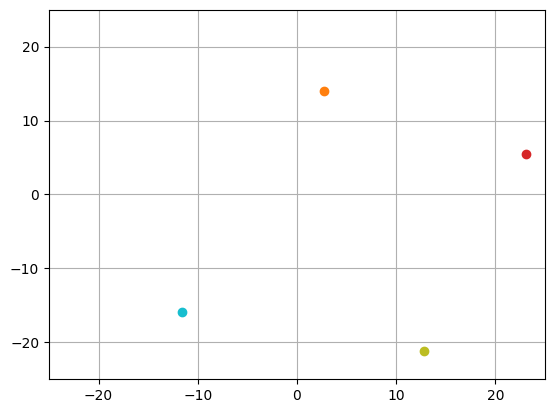

In [9]:
%%time

#The path below should be the path that YOU are saving every frame to. I didnt want to provide my personal one, so unfortunately this is the one thing you will have to do yourself
dir = './Images for simulation'

for f in os.listdir(dir):
    os.remove(os.path.join(dir, f))

# Start out by generating the objects, in this case 10, and put them all in one big array
bodies = generateParticles(50)

# Calculate the force between each every body and every other body
#Start the main loop
for i in range(1000):
    figure, axes = plt.subplots()
    update(bodies,dt=1/120)
    
    for j in range(len(bodies)):
        axes.scatter(bodies[j].position[0], bodies[j].position[1])

    plt.grid()
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    
    figure.savefig('./Images for simulation/graph'+str(i)+'.png')
    plt.close('all')